In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [68]:
### reading csv file 
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )

dataset.iloc[121:].head(4) # index 122, 123 need to be removed from dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


## 1.1 Dropping rows which have no information

In [69]:

dataset.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)

dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [71]:

dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [72]:
# removing spaces from column names
dataset.columns= [col_name.strip() for col_name in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [73]:
### converting all feature values to string so that we can clean data.
dataset=dataset.astype(str)

In [74]:
### somes values in columns also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    dataset[feature]= dataset[feature].str.replace(" ","")

In [75]:
### index no 165 for feature name FWI has value fire
dataset[dataset['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [76]:
### replacing fire value witha float value
dataset.loc[165,'FWI']=' 0.1'

In [77]:
dataset[dataset['Classes']== 'nan'].index

Int64Index([165], dtype='int64')

In [78]:
### replacing nan value wit fire to make data equal to the info given in dataset 

dataset.loc[165,'Classes']='fire'

In [79]:
dataset['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [80]:
dataset[dataset['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [81]:
### changing datatypes of features to numerical for numerical features as all are in object

In [82]:
datatype_convert={'Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 
                  }

dataset=dataset.astype(datatype_convert)
dataset.dtypes

day             object
month           object
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [83]:
dataset.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [84]:
# Printing all the categorical columns
categorical_col = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print('Categorical columns--',categorical_col)

# Printing all the numerical columns
numerical_col = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print('Numerical columns--',numerical_col)

Categorical columns-- ['day', 'month', 'year', 'Classes']
Numerical columns-- ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


## Checking for null values

In [85]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [86]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire


In [87]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [89]:
df = dataset

In [90]:
df.corr() ## Checking correlation between data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558495
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907610
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857791
FWI,0.558495,-0.570119,0.028850,-0.322715,0.686111,0.874816,0.740184,0.907610,0.857791,1.000000


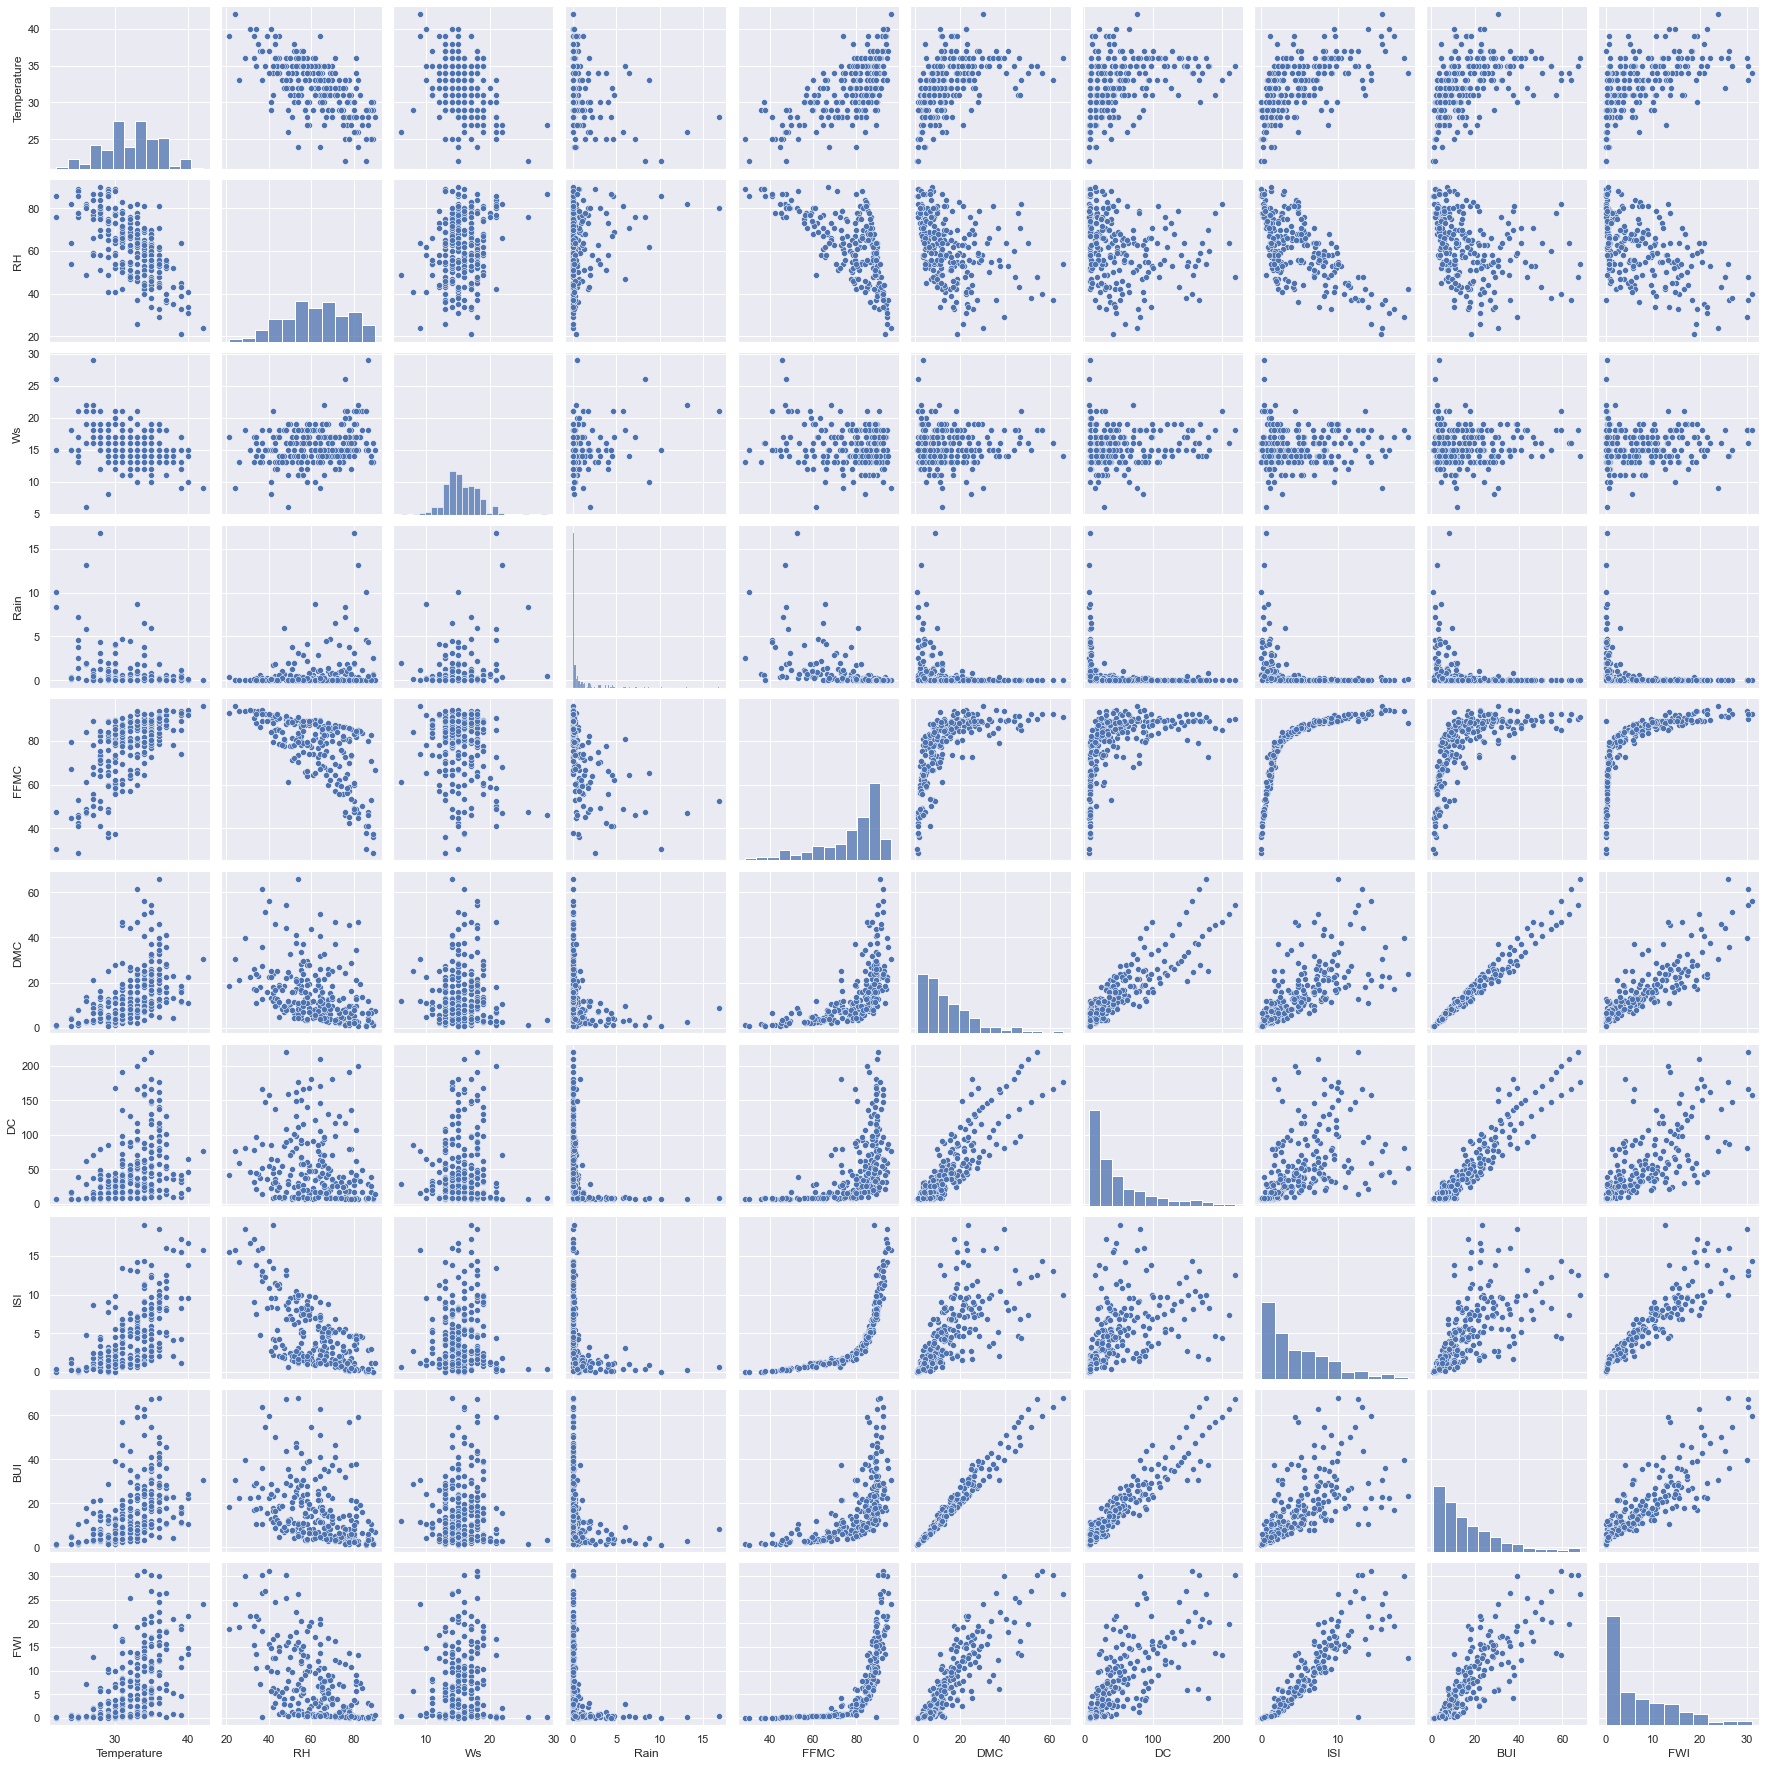

In [92]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

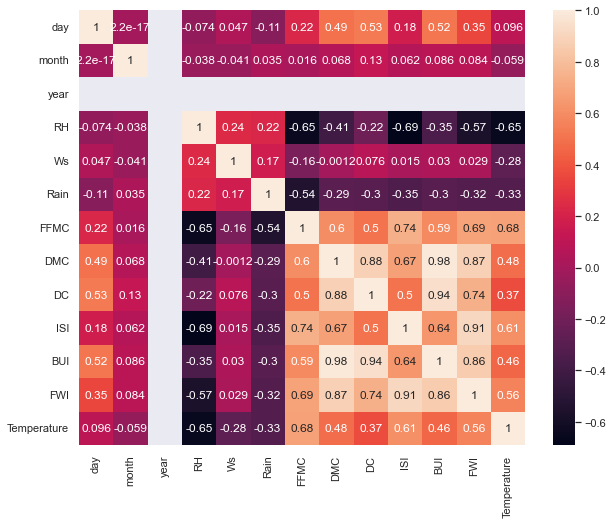

In [85]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(df.corr(),annot=True)

### Plotting Relationship Between Independent & Target Variables

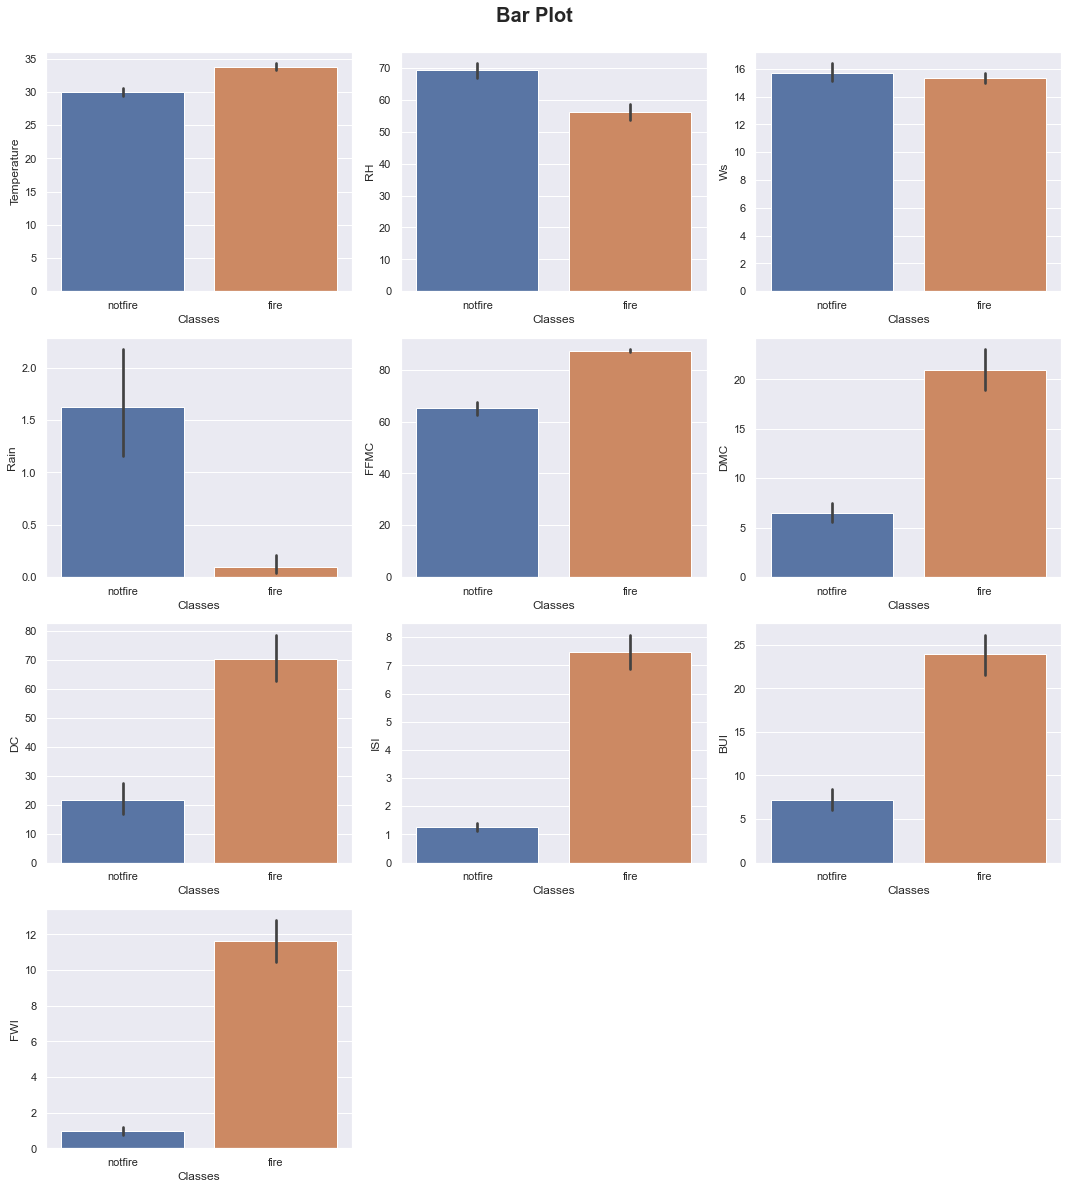

In [93]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numerical_col[i], x='Classes', data=df)
    plt.tight_layout()

In [ ]:
#Observations
#Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
#Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
# Temperature is positively collerated with FFMC,FWI and ISI. Temperature is negatively collerated with RH.
# In fire cases, less rain has occurred and temperature was on higher side.


## Analysing relation with plots

Text(0, 0.5, 'Classes')

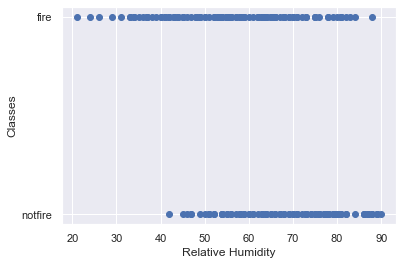

In [94]:
plt.scatter(df['RH'],df['Classes'])
plt.xlabel("Relative Humidity")
plt.ylabel("Classes")

Text(0, 0.5, 'Classes')

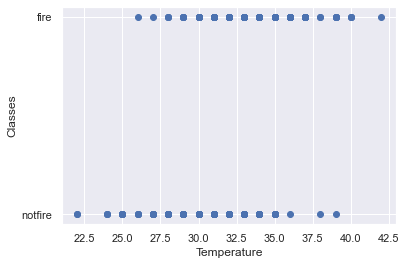

In [96]:
plt.scatter(df['Temperature'],df['Classes'])
plt.xlabel("Temperature")
plt.ylabel("Classes")


## Independent And Dependent Features

In [97]:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [98]:
X.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4


In [99]:
y.head(2)

0    notfire
1    notfire
Name: Classes, dtype: object

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [103]:
X_train.shape

(163, 13)

In [104]:
y_train.shape

(163,)

In [105]:
X_test.shape

(81, 13)

In [106]:
y_test.shape

(81,)

## Model training

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
regression=LogisticRegression()

In [109]:
regression.fit(X_train,y_train)

C:\Users\priyank.shekhar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
## print the coefficients and the intercept
print(regression.coef_)

[[ 0.1287428  -0.14878604  0.05969198  0.44642365  0.06086004 -0.46428867
  -0.00494548 -1.58016581  0.13334561 -0.01914943 -0.60294478  0.02393148
  -0.75205387]]


In [111]:
print(regression.intercept_)

[3.56163507e-05]


In [112]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [113]:
reg_pred

array(['notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'fire', 'fire', 'notfire', 'fire', 'notfire',
       'fire', 'fire', 'fire', 'notfire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'notfire', 'notfire', 'notfire', 'notfire',
       'fire', 'notfire', 'notfire', 'fire', 'notfire', 'fire', 'notfire',
       'notfire', 'fire', 'notfire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'notfire', 'fire', 'fire', 'notfire',
       'notfire', 'fire', 'fire', 'fire', 'fire', 'notfire', 'fire',
       'fire', 'notfire', 'fire', 'notfire', 'fire', 'notfire', 'notfire',
       'notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire', 'notfire',
       'notfire', 'fire', 'notfire', 'notfire', 'fire', 'fire', 'fire',
       'notfire', 'fire', 'notfire'], dtype=object)

In [115]:
y_pred = regression.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(30)

,Actual,Predicted
162,notfire,notfire
60,fire,fire
61,notfire,notfire
63,notfire,notfire
69,fire,fire
83,fire,fire
55,fire,fire
211,fire,notfire
46,fire,fire
35,fire,fire


In [116]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[47,  4],
       [ 0, 30]], dtype=int64)

In [117]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [118]:
#Checking accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9506172839506173

In [119]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9215686274509803

In [120]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [122]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9591836734693878